In [1]:
library(SuperExactTest)
library(UpSetR)
library(RVenn)
#library(dplyr)
library(tidyverse)

Loading required package: grid

Attaching package: ‘SuperExactTest’

The following objects are masked from ‘package:base’:

    intersect, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::unite()  masks RVenn::unite()


In [2]:
traits=gsub(" +all.tsv","",gsub("FDGENEA\\.","",list.files(path="..",pattern="*all.tsv")))

In [3]:
d=do.call(rbind.data.frame,lapply(seq_len(length(traits)),function(i){
    data.frame(trait=traits[i],read.delim(paste0("../",sprintf("FDGENEA.%s all.tsv",traits[i])),sep="\t",stringsAsFactors=FALSE),stringsAsFactors=FALSE)
    }))
head(d)

,trait,geneid,associated,downstream,downstream_reg,downstream_TF,downstream_cab,downstream_cb,direct,direct_reg,⋯,is_regulator,gene_name,reg_class,superfamily,description,color,test_stat,b,qval_lrt,direction
,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,colony_size.normal_vs_enlarged,Pp3c1_10460.mRNA,TRUE,0,0,0,0.9355340,-0.9355340,0,0,⋯,FALSE,NA,NA,NA,PF00407 - Pathogenesis-related protein Bet v I family (Bet_v_1) (1 of 7),#C66764,6.724139,-0.9355340,3.695407e-02,down
2,colony_size.normal_vs_enlarged,Pp3c1_10970.mRNA,TRUE,0,0,0,0.3323997,0.3323997,0,0,⋯,FALSE,NA,NA,NA,PF08263 - Leucine rich repeat N-terminal domain (LRRNT_2) (1 of 120),#E486B7,5.733587,0.3323997,5.237857e-02,up
3,colony_size.normal_vs_enlarged,Pp3c1_11030.mRNA,TRUE,0,0,0,0.8962726,0.8962726,0,0,⋯,FALSE,NA,NA,NA,2.7.11.18 - [Myosin light-chain] kinase / Smooth-muscle-myosin-light-chain kinase (1 of 3),#E486B7,14.054509,0.8962726,1.658819e-03,up
4,colony_size.normal_vs_enlarged,Pp3c1_11310.mRNA,TRUE,0,0,0,6.0579269,-6.0579269,0,0,⋯,FALSE,NA,NA,NA,NA,#C66764,59.261505,-6.0579269,3.741178e-12,down
5,colony_size.normal_vs_enlarged,Pp3c1_11500.mRNA,TRUE,0,0,0,1.9195229,-1.9195229,0,0,⋯,FALSE,NA,NA,NA,K11816 - indole-3-pyruvate monooxygenase (YUCCA) (1 of 5),#E486B7,21.327909,-1.9195229,6.695231e-05,down
6,colony_size.normal_vs_enlarged,Pp3c1_11980.mRNA,TRUE,0,0,0,0.5203359,0.5203359,0,0,⋯,FALSE,NA,NA,NA,PF06886 - Targeting protein for Xklp2 (TPX2) (TPX2) (1 of 18),#E486B7,19.270473,0.5203359,1.652477e-04,up


In [4]:
str(d)

'data.frame':	38436 obs. of  29 variables:
 $ trait                    : chr  "colony_size.normal_vs_enlarged" "colony_size.normal_vs_enlarged" "colony_size.normal_vs_enlarged" "colony_size.normal_vs_enlarged" ...
 $ geneid                   : chr  "Pp3c1_10460.mRNA" "Pp3c1_10970.mRNA" "Pp3c1_11030.mRNA" "Pp3c1_11310.mRNA" ...
 $ associated               : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ downstream               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ downstream_reg           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ downstream_TF            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ downstream_cab           : num  0.936 0.332 0.896 6.058 1.92 ...
 $ downstream_cb            : num  -0.936 0.332 0.896 -6.058 -1.92 ...
 $ direct                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ direct_reg               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ direct_TF                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ direct_cab               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ direct_cb                : num  0 0 0 0 0 0 0 

In [5]:
table(d$trait,paste(d$associated,d$direction),d$is_regulator)

, ,  = FALSE

                                                
                                                 FALSE down FALSE unchanged
  colony_size.normal_vs_enlarged                          0               0
  colony_size.normal_vs_reduced                           0               0
  development_of_phyllids.normal_vs_aberrant              0               0
  development_of_phyllids.normal_vs_delayed               0               0
  elongation_caulonema_early.normal_vs_elongated          0               0
  elongation_caulonema_early.normal_vs_reduced            0               0
  elongation_caulonema_late.normal_vs_elongated           0               0
  elongation_caulonema_late.normal_vs_reduced             0               0
  gametophore_formation.normal_vs_aberrant                0               0
  gametophore_formation.normal_vs_arrested                0               0
  gametophore_formation.normal_vs_delayed                 0               0
  number_buds_per_filamen

In [22]:
#associated=enriched subnetwork and qvalue_lrt<0.1
dd=subset(d,d$qval_lrt<0.1 & associated) 
nrow(dd)
nrow(d)
table(d$associated)

[1] 37597

[1] 38436


FALSE  TRUE 
  839 37597 

List of 17
 $ colony_size.normal_vs_enlarged                : chr [1:4143] "Pp3c1_10460.mRNA" "Pp3c1_10970.mRNA" "Pp3c1_11030.mRNA" "Pp3c1_11310.mRNA" ...
 $ colony_size.normal_vs_reduced                 : chr [1:1227] "Pp3c1_1080.mRNA" "Pp3c1_12290.mRNA" "Pp3c1_12470.mRNA" "Pp3c1_13570.mRNA" ...
 $ development_of_phyllids.normal_vs_aberrant    : chr [1:1035] "Pp3c1_12470.mRNA" "Pp3c1_12810.mRNA" "Pp3c1_13060.mRNA" "Pp3c1_13260.mRNA" ...
 $ development_of_phyllids.normal_vs_delayed     : chr [1:3593] "Pp3c1_10460.mRNA" "Pp3c1_11030.mRNA" "Pp3c1_11310.mRNA" "Pp3c1_11500.mRNA" ...
 $ elongation_caulonema_early.normal_vs_elongated: chr [1:1875] "Pp3c1_10530.mRNA" "Pp3c1_10880.mRNA" "Pp3c1_11190.mRNA" "Pp3c1_12140.mRNA" ...
 $ elongation_caulonema_early.normal_vs_reduced  : chr [1:1633] "Pp3c1_11980.mRNA" "Pp3c1_12470.mRNA" "Pp3c1_13060.mRNA" "Pp3c1_14630.mRNA" ...
 $ elongation_caulonema_late.normal_vs_elongated : chr [1:5454] "Pp3c1_10460.mRNA" "Pp3c1_1080.mRNA" "Pp3c1_11030.mRNA" "Pp3c1

png 
  2

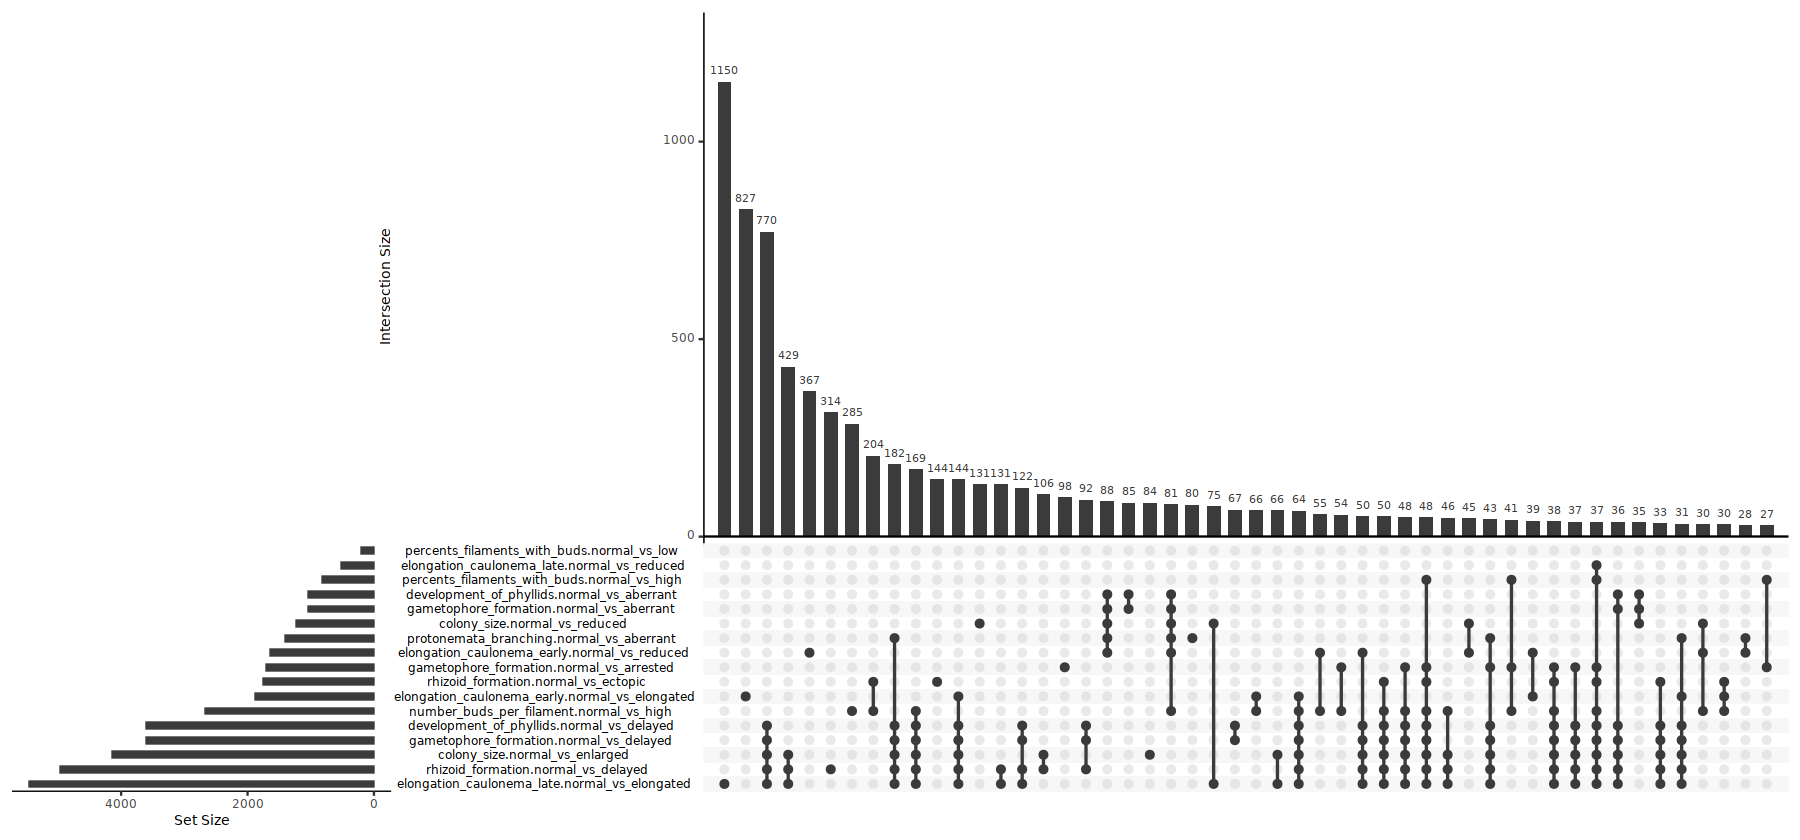

In [23]:
P=lapply(traits,function(n) unique(dd[dd$trait==n,"geneid"]))
names(P)=traits
str(P)
options(repr.plot.width=15, repr.plot.height=7)
u=upset(fromList(P), order.by = "freq",keep.order = TRUE,nsets=length(names(P)),nintersects=50,mb.ratio = c(0.65, 0.35))
u
pdf("FDGENEA.overall_intersections.upsetR.pdf",width=15,height=7)
u
dev.off()

List of 34
 $ colony_size.normal_vs_enlarged.up                  : chr [1:2108] "Pp3c1_10970.mRNA" "Pp3c1_11030.mRNA" "Pp3c1_11980.mRNA" "Pp3c1_12070.mRNA" ...
 $ colony_size.normal_vs_reduced.up                   : chr [1:734] "Pp3c1_1080.mRNA" "Pp3c1_13570.mRNA" "Pp3c1_13890.mRNA" "Pp3c1_14330.mRNA" ...
 $ development_of_phyllids.normal_vs_aberrant.up      : chr [1:473] "Pp3c1_12810.mRNA" "Pp3c1_13890.mRNA" "Pp3c1_23790.mRNA" "Pp3c1_27270.mRNA" ...
 $ development_of_phyllids.normal_vs_delayed.up       : chr [1:1699] "Pp3c1_11030.mRNA" "Pp3c1_11980.mRNA" "Pp3c1_12730.mRNA" "Pp3c1_12800.mRNA" ...
 $ elongation_caulonema_early.normal_vs_elongated.up  : chr [1:771] "Pp3c1_11190.mRNA" "Pp3c1_12140.mRNA" "Pp3c1_14300.mRNA" "Pp3c1_14540.mRNA" ...
 $ elongation_caulonema_early.normal_vs_reduced.up    : chr [1:829] "Pp3c1_12470.mRNA" "Pp3c1_13060.mRNA" "Pp3c1_14630.mRNA" "Pp3c1_14631.mRNA" ...
 $ elongation_caulonema_late.normal_vs_elongated.up   : chr [1:2731] "Pp3c1_1080.mRNA" "Pp3c1_11030.

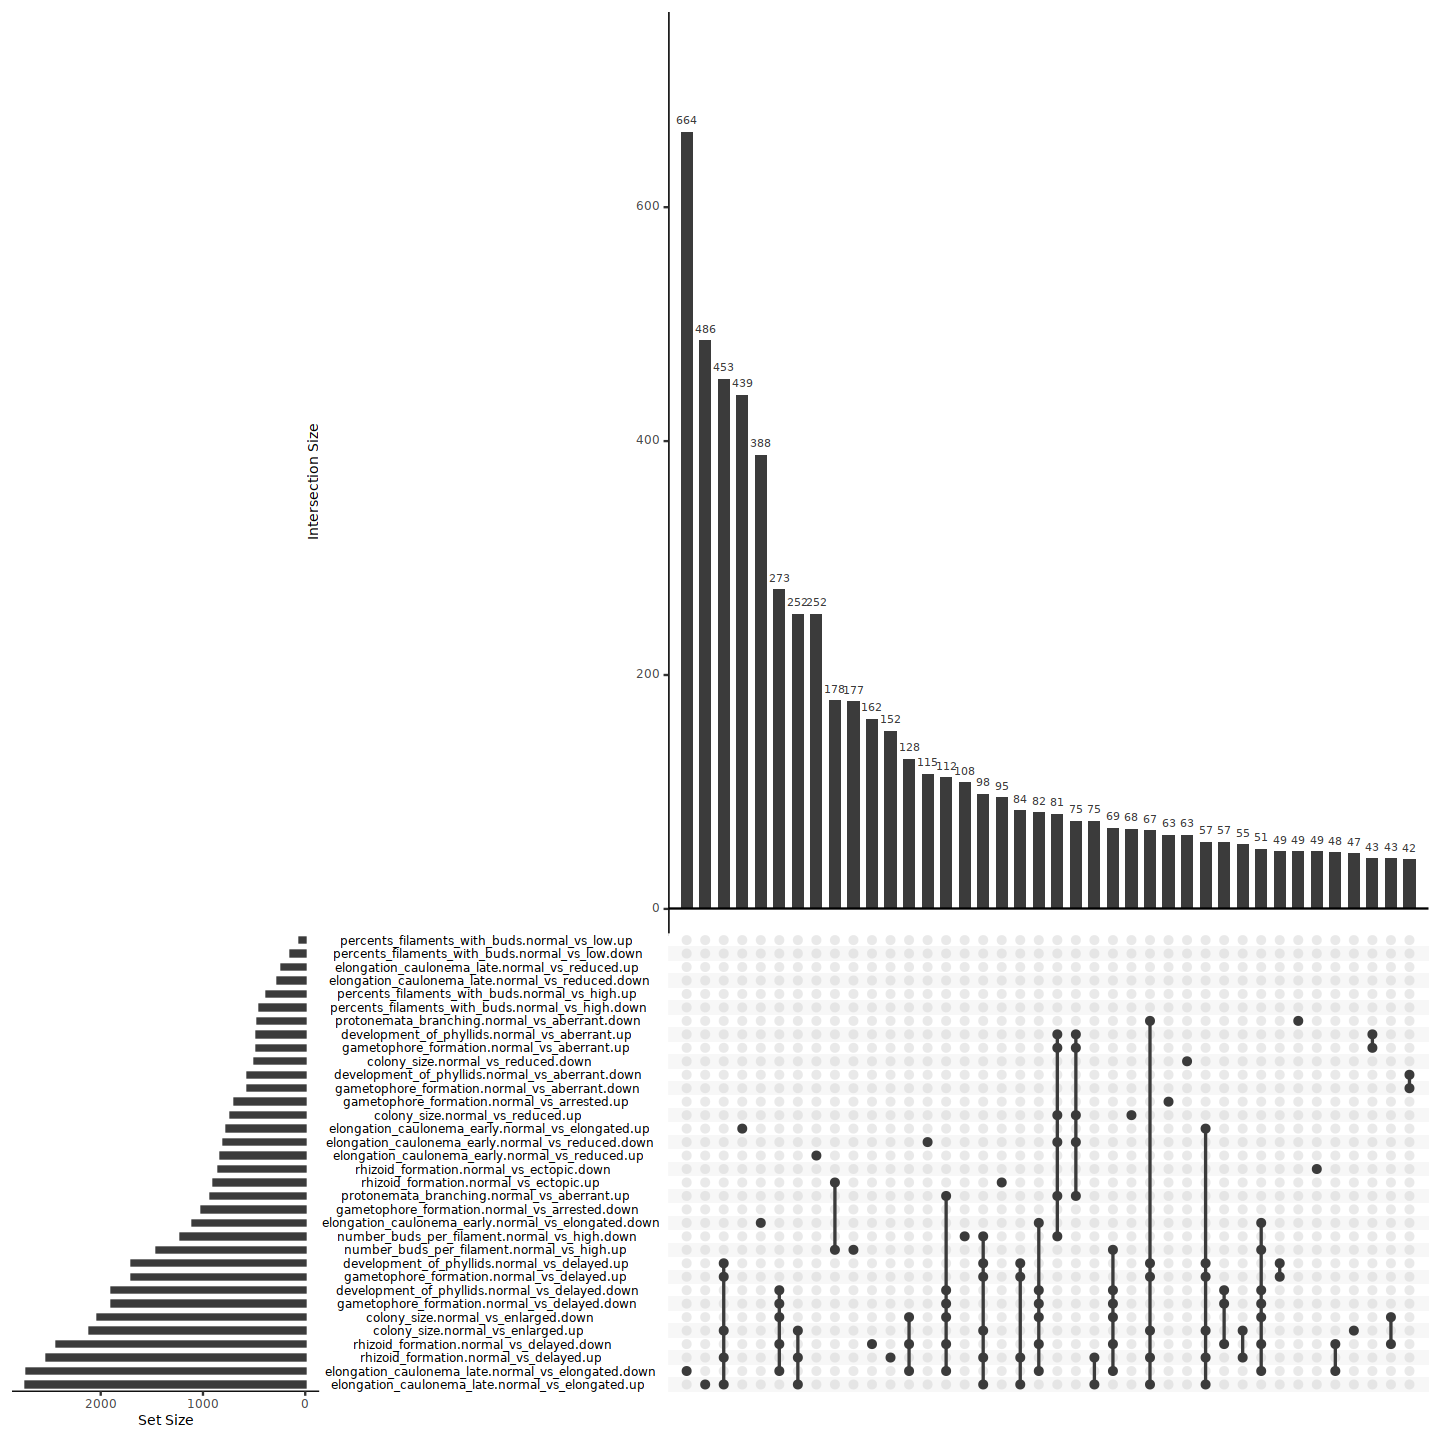

In [24]:
options(repr.plot.width=12, repr.plot.height=12)

Pu=lapply(traits,function(n) unique(d[d$trait==n & d$associated == TRUE & d$direction=="up","geneid"]))
names(Pu)=paste(traits,"up",sep=".")
Pd=lapply(traits,function(n) unique(d[d$trait==n & d$associated == TRUE & d$direction=="down","geneid"]))
names(Pd)=paste(traits,"down",sep=".")
Pt=lapply(traits,function(n) unique(d[d$trait==n & d$associated == FALSE ,"geneid"]))
names(Pt)=paste(traits,"upstream_TF",sep=".")
P=c(Pu,Pd)
          
str(P)
u=upset(fromList(P), order.by = "freq",keep.order = TRUE,nsets=length(names(P)),nintersects=40,mb.ratio = c(0.65, 0.35))
u

png 
  2

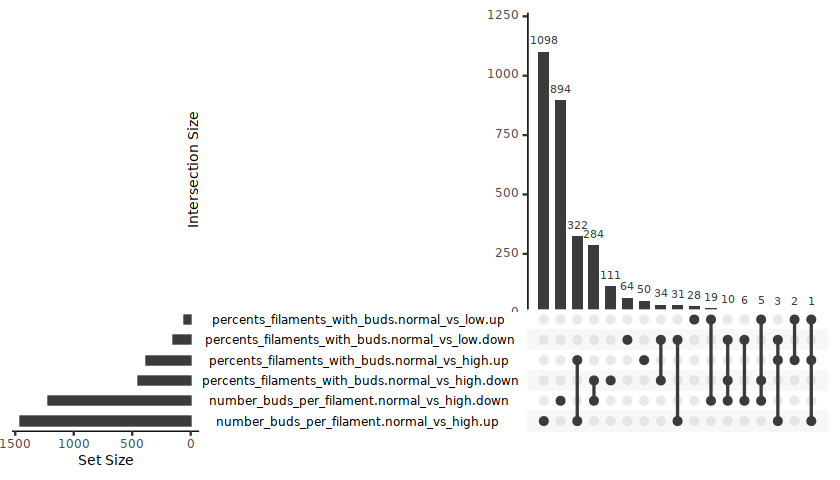

In [26]:
PP=P[grep("filament",names(P))]
options(repr.plot.width=7, repr.plot.height=4)
u=upset(fromList(PP), order.by = "freq",keep.order = TRUE,nsets=length(names(PP)),nintersects=40,mb.ratio = c(0.65, 0.35))
u
pdf("FDGENEA.UpSetR.bud_formation.pdf",width=7,height=4)
u
dev.off()

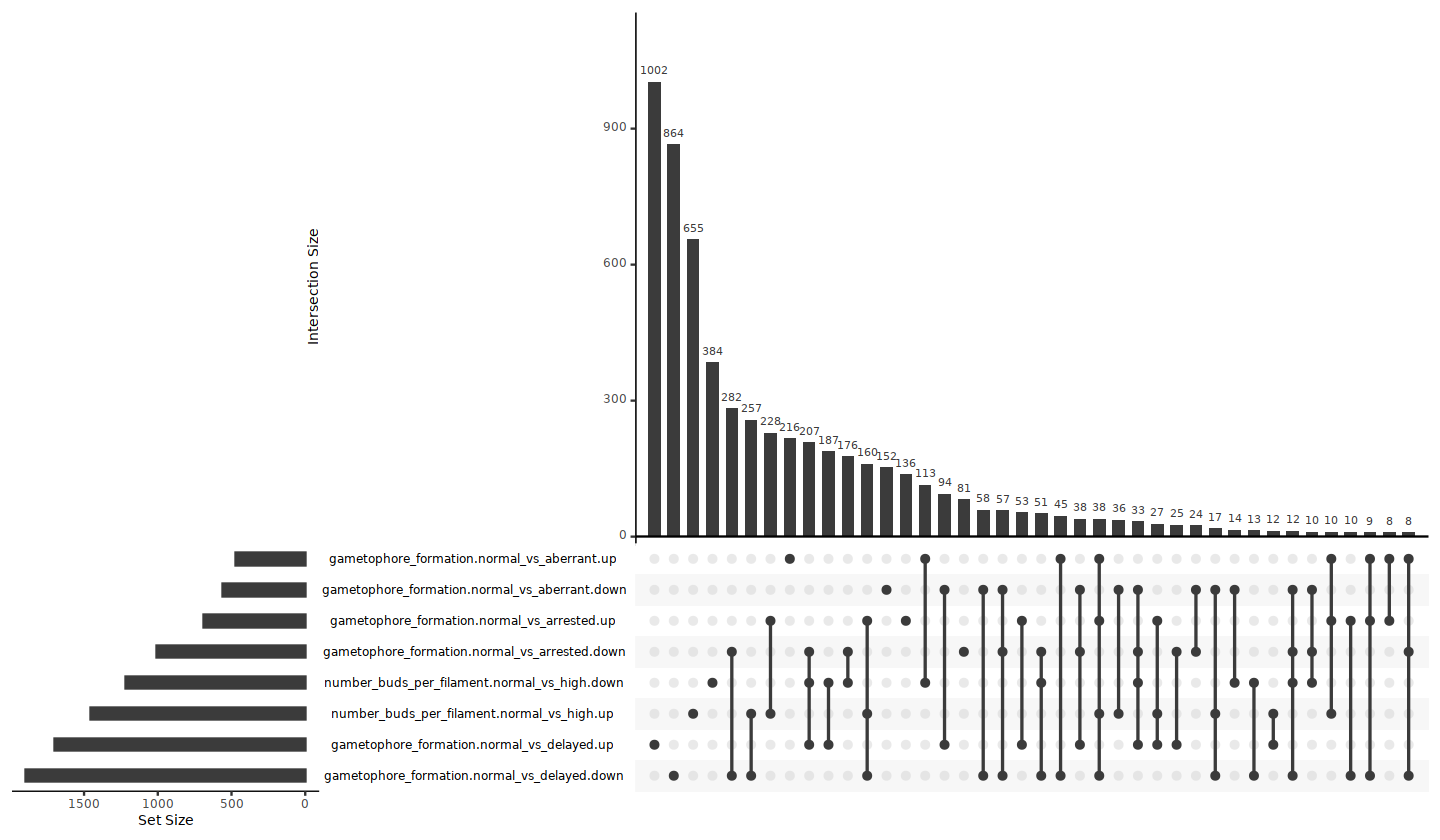

In [9]:
PP=P[grep("number.+filament|gametophore",names(P))]
options(repr.plot.width=12, repr.plot.height=7)
u=upset(fromList(PP), order.by = "freq",keep.order = TRUE,nsets=length(names(PP)),nintersects=40,mb.ratio = c(0.65, 0.35))
u

In [31]:
col=read.delim("../../subnetwork_colours.csv",sep=",",stringsAsFactors=FALSE)
col2=as.character(col$colour)
names(col2)=col$network
col2

I        II       III        IV         V        VI       VII      VIII 
"#999999" "#FFE529" "#5A6A99" "#FF7F00" "#E486B7" "#6B886E" "#E41A1C" "#CA9A2C" 
       IX         X        XI 
"#AD5882" "#C66764" "#449B76"

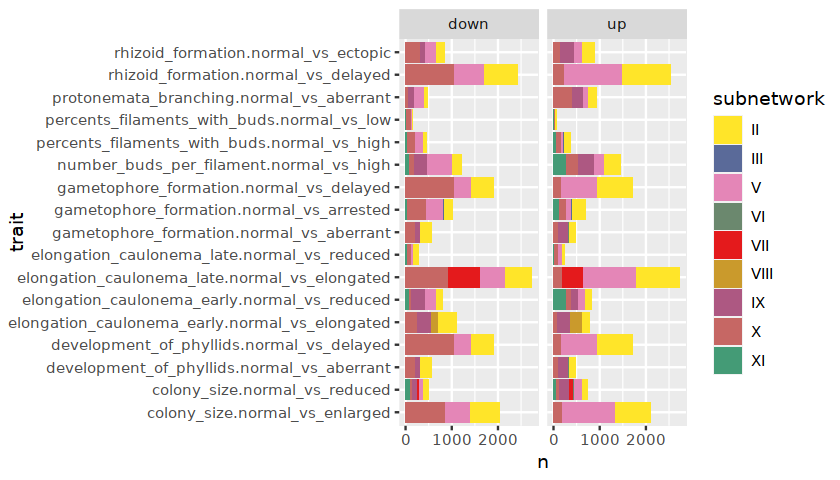

In [38]:
options(repr.plot.width=7, repr.plot.height=4)
g=dd %>% rename(subnetwork=community) %>% 
mutate(subnetwork=factor(subnetwork,levels=as.character(as.roman(1:11)))) %>%
group_by(trait, direction,subnetwork) %>% count() %>% 
ggplot(aes(x=trait,y=n,fill=subnetwork)) + 
geom_bar(stat="identity") + 
facet_wrap(~direction) +
scale_fill_manual(values=col2) +
coord_flip()
g
ggsave(g,filename="FDGENEA.all_associated.pdf",width=7,height=4)